**Coursera Capstone project - The optimal beer path of Stockholm**

Please see the Wiki for background:
https://github.com/PetterWe/Coursera_Capstone/wiki


In [1]:
#Importing the libraries we'll need
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import folium 
import requests
import networkx as nx
from pandas.io.json import json_normalize

First off we need to import all the bars in the vicinity of Stockholm Central.
Stockholm Central is located at lat:59.331668, long:18.060226
The range will be 5000 m radius from this location to make sure we get all relevant results.

In [2]:
CLIENT_ID = 'T5YIQH0SSBIVQZBBXUP13GWFV0LCDF3EMAKVYLDVRZJHR0IC' #  Foursquare ID
CLIENT_SECRET = 'XH2CEN5VCSORJR1XIUE0LIJ0QCXSSRCZZWNCIAM33VPEKFCB' #  Foursquare Secret
VERSION = '20200224' #Today's date
LIMIT = 300
print('Credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print('Limit: ', LIMIT)

Credentails:
CLIENT_ID: T5YIQH0SSBIVQZBBXUP13GWFV0LCDF3EMAKVYLDVRZJHR0IC
CLIENT_SECRET:XH2CEN5VCSORJR1XIUE0LIJ0QCXSSRCZZWNCIAM33VPEKFCB
Limit:  300


In [3]:
#Define URL to search for a specific query and radius
search_query = 'Bar'
radius = 5000
latitude = 59.331668
longitude = 18.060226
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=T5YIQH0SSBIVQZBBXUP13GWFV0LCDF3EMAKVYLDVRZJHR0IC&client_secret=XH2CEN5VCSORJR1XIUE0LIJ0QCXSSRCZZWNCIAM33VPEKFCB&ll=59.331668,18.060226&v=20200224&query=Bar&radius=5000&limit=300'

In [4]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e90c484216785001b276e5b'},
 'response': {'venues': [{'id': '4adcdae8f964a520405921e3',
    'name': 'Lobby Bar - Royal Viking',
    'location': {'address': 'Vasagatan 1',
     'crossStreet': 'Radisson Blu Royal Viking Hotel',
     'lat': 59.33145023555394,
     'lng': 18.058094307140752,
     'labeledLatLngs': [{'label': 'display',
       'lat': 59.33145023555394,
       'lng': 18.058094307140752}],
     'distance': 123,
     'postalCode': '111 20',
     'cc': 'SE',
     'city': 'Stockholm',
     'state': 'Storstockholm',
     'country': 'Sverige',
     'formattedAddress': ['Vasagatan 1 (Radisson Blu Royal Viking Hotel)',
      '111 20 Stockholm',
      'Sverige']},
    'categories': [{'id': '4bf58dd8d48988d1d5941735',
      'name': 'Hotel Bar',
      'pluralName': 'Hotel Bars',
      'shortName': 'Hotel Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_bar_',
       'suffix': '.png'},
      'primary': True}],
    '

In [5]:
Total_list_of_bars_json = results ['response']['venues']
Total_list_of_bars = json_normalize(Total_list_of_bars_json)
Total_list_of_bars.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,4adcdae8f964a520405921e3,Lobby Bar - Royal Viking,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",v-1586545817,False,Vasagatan 1,Radisson Blu Royal Viking Hotel,59.331450,18.058094,"[{'label': 'display', 'lat': 59.33145023555394...",123,111 20,SE,Stockholm,Storstockholm,Sverige,[Vasagatan 1 (Radisson Blu Royal Viking Hotel)...,NaN,NaN
1,56fc0d53498e8c151a0eb976,&bar,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",v-1586545817,False,Apelbergsgatan 40,NaN,59.336388,18.064024,"[{'label': 'display', 'lat': 59.33638825181762...",567,NaN,SE,Stockholm,Storstockholm,Sverige,"[Apelbergsgatan 40, Stockholm, Sverige]",NaN,NaN
2,4c167c4896040f47d0ea72a5,Barcelona Bar,"[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",v-1586545817,False,Drottninggatan 34,Kulturhuset,59.331713,18.063842,"[{'label': 'display', 'lat': 59.33171346483061...",205,111 51,SE,Stockholm,Storstockholm,Sverige,"[Drottninggatan 34 (Kulturhuset), 111 51 Stock...",NaN,NaN
3,4b3923a4f964a520005725e3,Pyttirian kök & bar,"[{'id': '4bf58dd8d48988d1c6941735', 'name': 'S...",v-1586545817,False,Kungsgatan 44,Kungsgatan,59.335209,18.062073,"[{'label': 'display', 'lat': 59.33520920110084...",407,111 35,SE,Stockholm,Storstockholm,Sverige,"[Kungsgatan 44 (Kungsgatan), 111 35 Stockholm,...",Klara,NaN
4,58b963b5109dfe053d2f5152,Reload Superfood Bar,"[{'id': '4bf58dd8d48988d1bd941735', 'name': 'S...",v-1586545817,False,Sergelgatan 24,NaN,59.334054,18.063428,"[{'label': 'display', 'lat': 59.33405379224329...",321,111 57,SE,Stockholm,Storstockholm,Sverige,"[Sergelgatan 24, 111 57 Stockholm, Sverige]",NaN,NaN


In [6]:
Total_list_of_bars.shape

(50, 19)

Apparently the Foursquare API only provide a maximum of 50 hits (at least in the free version). I cannot find that limit in their documentation, but it seems to be so, as I've searched a 50 000 meter radius of Stockholm and get a maximum of 50 hits. Also according to their documentation there is a hierarchy of categories, where 'Bar' is the super category of 'Beer bar', 'Cocktail Bar', etc.
Nightclub seems to be it's own category, altough there are not that many hits, see below:
Searching with 'Beer bar' gives 50 results with a radius of 5000 from Stockholm Central
Searching with 'Cocktail' gives 8 results with a radius of 5000 from Stockholm Central
Searching with 'Nightclub' gives 6 results with a radius of 5000 from Stockholm Central
Searching with 'Bar' gives 50 results with a radius of 5000 from Stockholm Central
Searching with 'Brewery' gives 6 results with a radius of 5000 from Stockholm Central
Searching with 'Pub' gives 50 results with a radius of 5000 from Stockholm Central

So we'll concatenate the results of 'Bar' and 'Nightclub', and also find the minimum range (400 meters) which will yield 50 hits of 'Bars'.

In [7]:
#Define URL to search for a specific query and radius
search_query = 'Nightclub'
radius = 5000
latitude = 59.331668
longitude = 18.060226
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


In [8]:
nightClubs = requests.get(url).json()
Total_list_of_NightClubs_json = nightClubs ['response']['venues']
Total_list_of_NightClubs = json_normalize(Total_list_of_NightClubs_json)
Total_list_of_NightClubs.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode
0,5067711ce4b0298864daca58,Tabu - Bar & Nightclub,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",v-1586545833,False,Kungsgatan 15,59.336027,18.068830,"[{'label': 'display', 'lat': 59.336027, 'lng':...",688,SE,Stockholm,Storstockholm,Sverige,"[Kungsgatan 15, Stockholm, Sverige]",NaN,NaN
1,4bc5ebe6b387d13a96f2c0e8,M/S Silja Galaxy,"[{'id': '4bf58dd8d48988d12d951735', 'name': 'B...",v-1586545833,False,Hamnpirsvägen 10,59.349583,18.110569,"[{'label': 'display', 'lat': 59.34958276558797...",3484,SE,Stockholm,Storstockholm,Sverige,"[Hamnpirsvägen 10 (Stockholm - Turku), 115 41 ...",Stockholm - Turku,115 41
2,5725b24c498e39e3af0b2392,KLUBB VAKET,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",v-1586545833,False,Götgatan 99,59.307495,18.076990,"[{'label': 'display', 'lat': 59.3074951, 'lng'...",2854,SE,Stockholm,Storstockholm,Sverige,"[Götgatan 99, Stockholm, Sverige]",NaN,NaN
3,4d6992f8b6f46dcb329024b2,Carte Blanche,"[{'id': '4bf58dd8d48988d121941735', 'name': 'L...",v-1586545833,False,Dalvägen 24,59.369922,17.999846,"[{'label': 'display', 'lat': 59.36992185451483...",5465,SE,Solna,Storstockholm,Sverige,"[Dalvägen 24, 169 56 Solna, Sverige]",NaN,169 56
4,531d1d72498e2ac0d8af3863,Ritz Society Night Club,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",v-1586545833,False,Hallvägen 7B,59.292143,18.076943,"[{'label': 'display', 'lat': 59.2921433, 'lng'...",4501,SE,Johanneshov,Storstockholm,Sverige,"[Hallvägen 7B (Tolv Stockholm), Johanneshov, S...",Tolv Stockholm,NaN


In [9]:
Total_list_of_NightClubs.shape

(6, 17)

In [10]:
Total_list=Total_list_of_bars.append(Total_list_of_NightClubs, ignore_index=True, sort=True)
Total_list

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,4adcdae8f964a520405921e3,Vasagatan 1,SE,Stockholm,Sverige,Radisson Blu Royal Viking Hotel,123,[Vasagatan 1 (Radisson Blu Royal Viking Hotel)...,"[{'label': 'display', 'lat': 59.33145023555394...",59.331450,18.058094,NaN,111 20,Storstockholm,Lobby Bar - Royal Viking,v-1586545817,NaN
1,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,56fc0d53498e8c151a0eb976,Apelbergsgatan 40,SE,Stockholm,Sverige,NaN,567,"[Apelbergsgatan 40, Stockholm, Sverige]","[{'label': 'display', 'lat': 59.33638825181762...",59.336388,18.064024,NaN,NaN,Storstockholm,&bar,v-1586545817,NaN
2,"[{'id': '4bf58dd8d48988d150941735', 'name': 'S...",False,4c167c4896040f47d0ea72a5,Drottninggatan 34,SE,Stockholm,Sverige,Kulturhuset,205,"[Drottninggatan 34 (Kulturhuset), 111 51 Stock...","[{'label': 'display', 'lat': 59.33171346483061...",59.331713,18.063842,NaN,111 51,Storstockholm,Barcelona Bar,v-1586545817,NaN
3,"[{'id': '4bf58dd8d48988d1c6941735', 'name': 'S...",False,4b3923a4f964a520005725e3,Kungsgatan 44,SE,Stockholm,Sverige,Kungsgatan,407,"[Kungsgatan 44 (Kungsgatan), 111 35 Stockholm,...","[{'label': 'display', 'lat': 59.33520920110084...",59.335209,18.062073,Klara,111 35,Storstockholm,Pyttirian kök & bar,v-1586545817,NaN
4,"[{'id': '4bf58dd8d48988d1bd941735', 'name': 'S...",False,58b963b5109dfe053d2f5152,Sergelgatan 24,SE,Stockholm,Sverige,NaN,321,"[Sergelgatan 24, 111 57 Stockholm, Sverige]","[{'label': 'display', 'lat': 59.33405379224329...",59.334054,18.063428,NaN,111 57,Storstockholm,Reload Superfood Bar,v-1586545817,NaN
5,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",False,51e91bd4498ef8cc571408e7,Kungsgatan 44,SE,Stockholm,Sverige,Kungshallen,411,"[Kungsgatan 44 (Kungshallen), 111 35 Stockholm...","[{'label': 'display', 'lat': 59.33523795250646...",59.335238,18.062097,NaN,111 35,Storstockholm,Grekiska grill & bar,v-1586545817,NaN
6,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4b571875f964a520372628e3,Hötorget,SE,Stockholm,Sverige,NaN,354,"[Hötorget, Stockholm, Sverige]","[{'label': 'display', 'lat': 59.33470653540777...",59.334707,18.062110,NaN,NaN,Storstockholm,Publik Restaurang & Bar,v-1586545817,NaN
7,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",False,4b9a72a1f964a52030b635e3,Kungsgatan 3,SE,Stockholm,Sverige,Stureplan,820,"[Kungsgatan 3 (Stureplan), Stockholm, Sverige]","[{'label': 'display', 'lat': 59.336075, 'lng':...",59.336075,18.071817,NaN,NaN,Storstockholm,Taco Bar,v-1586545817,NaN
8,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",False,4d3dccfd557d6dcb733f4844,Kungsgatan,SE,Stockholm,Sverige,Kungshallen,429,"[Kungsgatan (Kungshallen), Stockholm, Sverige]","[{'label': 'display', 'lat': 59.335407, 'lng':...",59.335407,18.062089,NaN,NaN,Storstockholm,Ikki Sushi Bar,v-1586545817,NaN
9,"[{'id': '4bf58dd8d48988d151941735', 'name': 'T...",False,4b4cac85f964a520ccb926e3,Kungsgatan 44,SE,Stockholm,Sverige,Kungshallen,406,"[Kungsgatan 44 (Kungshallen), 111 45 Stockholm...","[{'label': 'display', 'lat': 59.33519484780081...",59.335195,18.062076,NaN,111 45,Storstockholm,Taco Bar,v-1586545817,NaN


In [11]:
Total_list.shape

(56, 19)

Now we need to create the dataframe we'll start to work with, with the columns we need. 
When the dataframe is done we'll display the bars on a map.

In [12]:
Dataframe_of_bars_to_connect=Total_list[['name','location.lat','location.lng','location.distance']]
Dataframe_of_bars_to_connect.rename(columns={'name':'Name','location.lat':'Latitude', 'location.lng':'Longitude', 'location.distance':'Distance'}, inplace=True)
Dataframe_of_bars_to_connect

C:\Users\pc\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Name,Latitude,Longitude,Distance
0,Lobby Bar - Royal Viking,59.331450,18.058094,123
1,&bar,59.336388,18.064024,567
2,Barcelona Bar,59.331713,18.063842,205
3,Pyttirian kök & bar,59.335209,18.062073,407
4,Reload Superfood Bar,59.334054,18.063428,321
5,Grekiska grill & bar,59.335238,18.062097,411
6,Publik Restaurang & Bar,59.334707,18.062110,354
7,Taco Bar,59.336075,18.071817,820
8,Ikki Sushi Bar,59.335407,18.062089,429
9,Taco Bar,59.335195,18.062076,406


In [13]:
bars_of_Stockholm = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred on Stockholm Central

# add a red circle marker to represent Stockholm Central
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Stockholm Central',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(bars_of_Stockholm)

# add the bars as blue markers
Dataframe_of_bars_to_connect.apply(lambda row:folium.features.CircleMarker((row["Latitude"],row["Longitude"]), radius=5, fill_color='blue').add_to(bars_of_Stockholm), axis=1)
bars_of_Stockholm

Now we need to calculate which of the nodes are within the specified walking distance. This is of course something one can adjust, but we'll since the dataset seems to be made up of a lot of bars close to eachother, we'll start with 200 meters. This will create clusters of connected bars which can be used to calculate the optimal beer path. To this efficiently we'll use NetworkX, which is a graph library. We'll call the connections between bars edges. 

First we'll create a a dataframe where each row will be an edge, or a connection between bars.

We'll also illustrate this.

In [14]:
#It worked using iterrows and two API calls per iteration, no need to use asyncio and aiohttp
df_edges_raw=pd.DataFrame([])
for index, row in Dataframe_of_bars_to_connect.iterrows(): 
    #Iterating over each location to find the bars within distance
    search_query = 'Bar'
    radius = 200
    latitude = row["Latitude"]
    longitude = row["Longitude"]
    name_of_location=row["Name"]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    bar_res = requests.get(url).json()
    json_bar_res = bar_res ['response']['venues']
    df_bar_res = json_normalize(json_bar_res)
    df_bar_res['Search_Location']=name_of_location #We need to know from where we are searching to be able to connect the edges
    df_bar_res ['Search_Location_Lat']=latitude
    df_bar_res['Search_Location_Long']=longitude
    df_edges_raw=df_edges_raw.append(df_bar_res, ignore_index=True, sort=False )
    #We also need to fetch the Nightclubs
    search_query = 'Nightclub'
    nightClub_res = requests.get(url).json()
    json_nc_res=nightClub_res['response']['venues']
    df_nc_res = json_normalize(json_nc_res)
    df_nc_res['Search_Location']=name_of_location #We need to know from where we are searching
    df_nc_res ['Search_Location_Lat']=latitude
    df_nc_res ['Search_Location_Long']=longitude
    df_edges_raw=df_edges_raw.append(df_nc_res, ignore_index=True, sort=False )
    #We need to get the name of the location we are searching from into the dataframe too, to be able to add the edges
    

df_edges_raw.head()

KeyError: 'venues'

In [19]:
df_edges_raw.shape

(1948, 22)

We need to tidy this up a bit. What we need is the name and location of the search origin and the names and locations of the connected bars. We will also have duplicates.

In [21]:
df_edges=df_edges_raw[['name','location.lat','location.lng','location.distance','Search_Location','Search_Location_Lat','Search_Location_Long']]
df_edges.drop_duplicates(inplace=True)
df_edges.rename(columns={'name':'Name','location.lat':'Latitude', 'location.lng':'Longitude', 'location.distance':'Distance', 'Search_Location':'Origin','Search_Location_Lat':'Origin_Lat','Search_Location_Long':'Origin_Long'}, inplace=True)
df_edges.reset_index(drop=True, inplace=True)
df_edges

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Latitude,Longitude,Distance,Origin,Origin_Lat,Origin_Long
0,Lobby Bar - Royal Viking,59.331450,18.058094,0.0,Lobby Bar - Royal Viking,59.331450,18.058094
1,Spa Bar,59.331250,18.057937,24.0,Lobby Bar - Royal Viking,59.331450,18.058094
2,HIGH Bar Stockholm,59.331229,18.058435,31.0,Lobby Bar - Royal Viking,59.331450,18.058094
3,Taco Bar,59.330733,18.057749,82.0,Lobby Bar - Royal Viking,59.331450,18.058094
4,Stockholm Fisk,59.331488,18.058017,6.0,Lobby Bar - Royal Viking,59.331450,18.058094
...,...,...,...,...,...,...,...
969,Deck Bar,59.351486,18.111034,213.0,M/S Silja Galaxy,59.349583,18.110569
970,M/S Silja Galaxy,59.349583,18.110569,0.0,M/S Silja Galaxy,59.349583,18.110569
971,Show Bar,59.349667,18.108319,128.0,M/S Silja Galaxy,59.349583,18.110569
972,M/S Baltic Princess,59.349525,18.111069,29.0,M/S Silja Galaxy,59.349583,18.110569


Now let's create a Graph with the "from pandas edgelist" function!

C:\Users\pc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


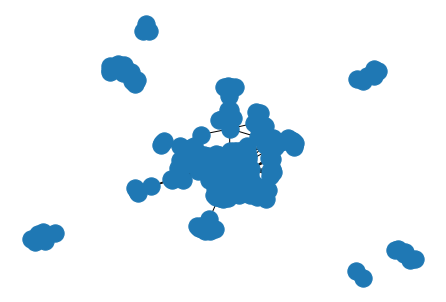

In [23]:
G=nx.from_pandas_edgelist(df_edges, 'Origin','Name',['Latitude','Longitude','Distance','Origin_Lat','Origin_Long'])
nx.draw(G)

We clearly see that there are clusters of bars/nightclubs which are not in walking distance. Some of these could have been connected if we are willing to walk a bit further, but for now let's keep the 200 m limit. 

So now we have our graph (G). With this we can employ Dijkstras algorithm to find the best path between the connected bars.